In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
from scipy import stats


import sys
sys.path.append('..')
import src as tools

If you had trouble with with imports above, check that you have all of the necessary requirements installed by running 
```
pip install -U -r requirements.txt
```
in the command line from the top level git directory.

## Parse and Process Data

This assumes you already have the necessary parquet files. If you don't have them, then you need to carry out the OCR work which can be done from the command line from the top level git directory by running 
```
cd scripts
python pdf_to_parquet.py 2019
python pdf_to_parquet.py 2020
```
*Warning, this OCR process will take several hours.*  If you have the parquet files, then you can proceed as follows.

In [2]:
# for year in [2019,2020]:
    
#     # Read available parquet files.
#     my_path = f"{tools.PROJECT_FOLDER}/data/{year}_parquet_logs"
#     files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
#     files.sort()

#     df_parquet = pd.DataFrame()
#     for f in files:
#         df_parquet = pd.concat([df_parquet,pd.read_parquet(f"{my_path}/{f}")])

#     df_parquet.reset_index(drop = True, inplace = True)

#     df = tools.parse_ocr_output(df_parquet, year)
#     filepath = f"{tools.PROJECT_FOLDER}/data/parsed_{year}_logs.csv"
#     df.to_csv(filepath)
#     print(f"Data printed to {filepath}")

The code above can also be carried from the command line by running the following from the top level git directory

```
cd scripts
python parquet_to_csv.py 2019
python parquet_to_csv.py 2020
```
This should only take a few minutes.

## Load Data

Now we can load the data and begin exploring data features and quality.

In [7]:
df_2019 = pd.read_csv(f"{tools.PROJECT_FOLDER}/data/2022_10_05_parsed_2019_encoded.csv", index_col = 0)
df_2020 = pd.read_csv(f"{tools.PROJECT_FOLDER}/data/2022_10_05_parsed_2020_encoded.csv", index_col = 0)

In [8]:
df = pd.concat([df_2019, df_2020])
df.reset_index(drop = True, inplace = True)

for col in df.columns:
    if "date" in col:
        df[col] = pd.to_datetime(df[col])
        
df.head()

,date,change_idx,log_num,pdf_page,call_datetime,call_reason,call_type,call_action,call_taker,street,call_category,responding_units,disp_datetime,clrd_datetime
0,2019-01-01,12,19-1,1,2019-01-01 03:41:00,PARKING CHECK,Initiated,SERVICES RENDERED,8.0,109.0,Initiated,1.0,2019-01-01 03:41:00,2019-01-01 03:42:17
1,2019-01-01,35,19-4,1,2019-01-01 08:34:00,BUILDING CHECK,Initiated,BUILDING CHECKED/SECURED,9.0,30.0,Initiated,4.0,2019-01-01 08:34:00,2019-01-01 08:35:33
2,2019-01-01,64,19-5,1,2019-01-01 08:42:00,BUILDING CHECK,Initiated,BUILDING CHECKED/SECURED,9.0,86.0,Initiated,4.0,2019-01-01 08:42:00,2019-01-01 08:43:21
3,2019-01-01,90,19-6,1,2019-01-01 08:46:00,BUILDING CHECK,Initiated,BUILDING CHECKED/SECURED,9.0,49.0,Initiated,4.0,2019-01-01 08:46:00,2019-01-01 08:47:07
4,2019-01-01,116,19-7,1,2019-01-01 08:47:00,BUILDING CHECK,Initiated,BUILDING CHECKED/SECURED,9.0,63.0,Initiated,4.0,2019-01-01 08:47:00,2019-01-01 08:48:05


## Verify Data Quality

In [9]:
df.count()/df.shape[0]*100

date                100.000000
change_idx          100.000000
log_num             100.000000
pdf_page            100.000000
call_datetime        92.115188
call_reason         100.000000
call_type           100.000000
call_action         100.000000
call_taker          100.000000
street              100.000000
call_category       100.000000
responding_units     84.154945
disp_datetime        93.064738
clrd_datetime        74.779252
dtype: float64

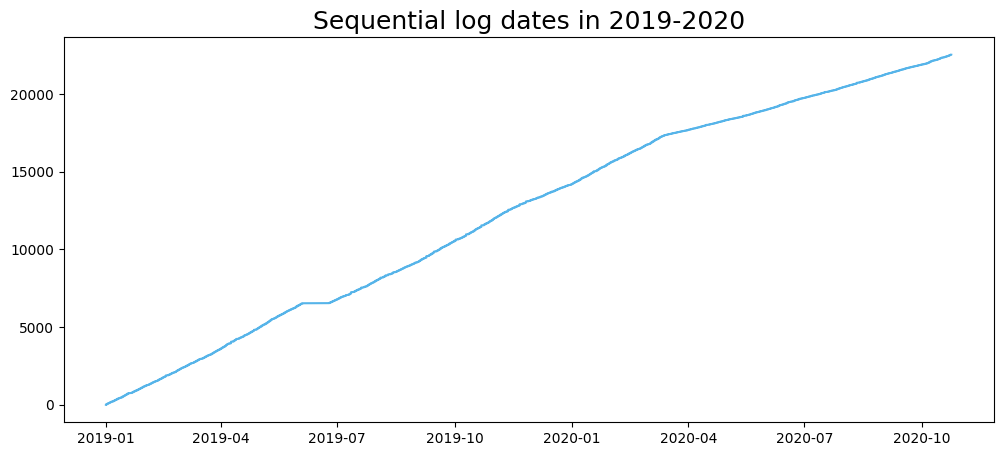

In [10]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(pd.to_datetime(df["date"]).values, df.index, color = "#56B4E9")
ax.set_xticks = pd.date_range("2019-01-01","2021-01-01", freq = "M")
ax.set_title("Sequential log dates in 2019-2020", fontsize = 18)
plt.show()

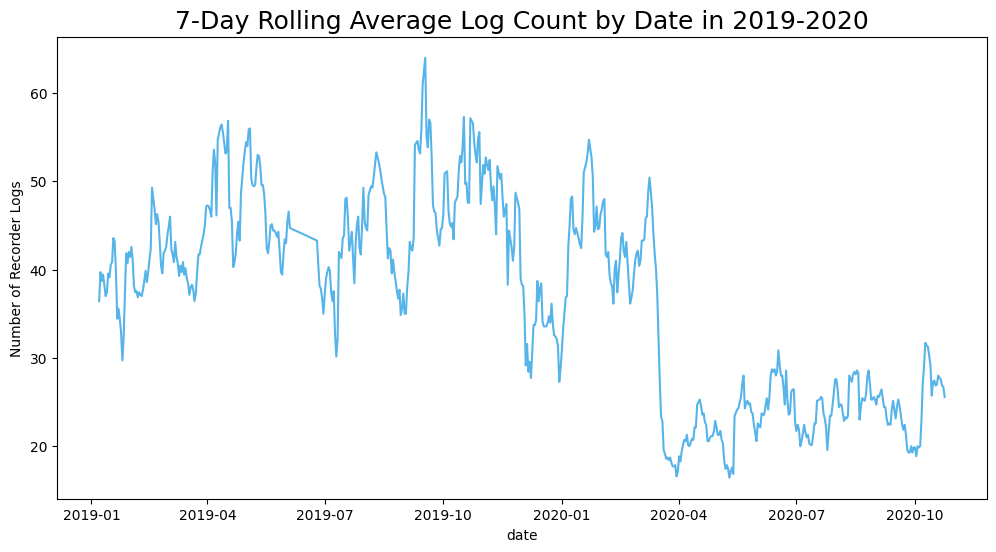

In [11]:
date_series = pd.Series(df["date"].value_counts())
date_series.sort_index(inplace = True)

height = date_series.rolling(window = 7).mean().values
x = date_series.rolling(window = 7).mean().index

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x, height, color = "#56B4E9")
ax.set_xlabel("date")
ax.set_ylabel("Number of Recorder Logs")

plt.title("7-Day Rolling Average Log Count by Date in 2019-2020", fontsize = 18)
plt.show()

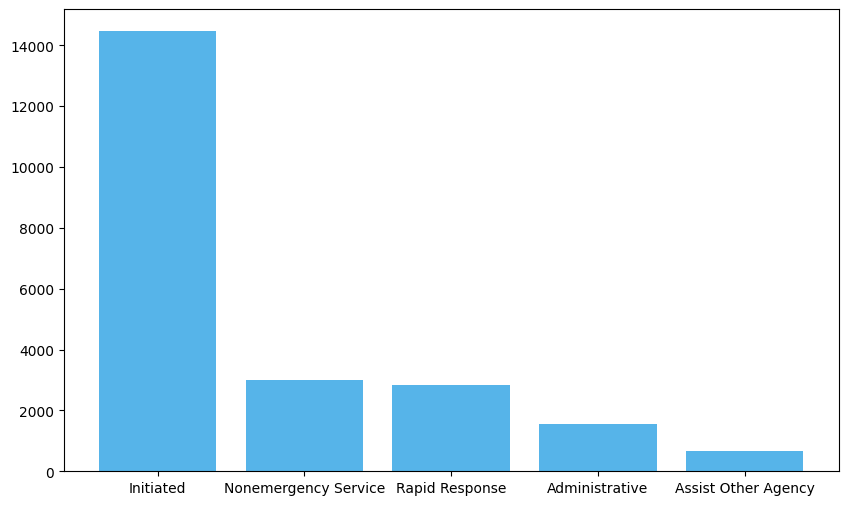

In [12]:
cats = df["call_category"].value_counts().to_dict()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(x = list(cats.keys()), height = list(cats.values()), color = "#56B4E9")

plt.show()

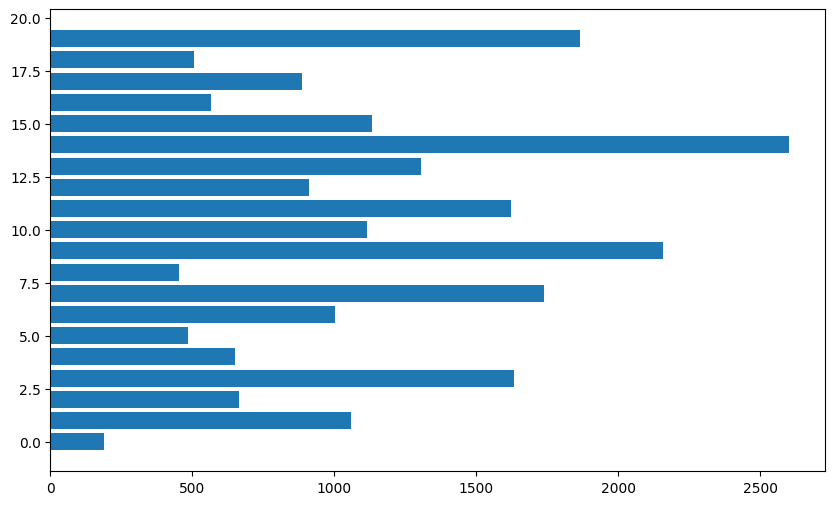

In [14]:
cats = df["call_taker"].value_counts().to_dict()
fig, ax = plt.subplots(figsize = (10,6))

ax.barh(y = list(cats.keys()), width = list(cats.values()))

plt.show()

## 